In [1]:
%cd examples/bayes_hierarchical_model/
%load_ext autoreload
%autoreload 2

/home/vmu/nu_stats/examples/bayes_hierarchical_model


In [2]:
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import sys
sys.path.append("../../")
from nu_stats.simulation import Simulation

In [4]:
# Simulation parameters
L = 1e48 * (u.erg/u.s)
gamma = 2.2
z = 0.3
F_diff_norm = 1e-15 * 1/(u.GeV * u.cm**2 * u.s)
Emin = 1e5 * u.GeV
Emax = 1e8 * u.GeV
Enorm = 1e5 * u.GeV

In [5]:
sim = Simulation(L, gamma, z, F_diff_norm = F_diff_norm,
    Emin=Emin, Emax=Emax, Enorm=Enorm)
sim.run(seed = 123)
fit_input = sim.get_data()


In [6]:
from nu_stats.bhmutils import BhStructure
bhm = BhStructure(fit_input)
bhm.load_model('stan/toy_bhm.stan')
bhmop = BhStructure(fit_input)
bhmop.load_model('stan/toy_bhm_otherpriors.stan')
bhmup = BhStructure(fit_input)
bhmup.load_model('stan/toy_bhm_unifpriors.stan')
bhmip = BhStructure(fit_input)
bhmip.load_model('stan/toy_bhm_implicitpriors.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm_otherpriors
INFO:cmdstanpy:compiling stan program, exe file: /home/vmu/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm_unifpriors
INFO:cmdstanpy:compiler options: stanc_options={'include_paths': ['/home/vmu/nu_stats/examples/bayes_hierarchical_model/stan']}, cpp_options=None
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm_unifpriors
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm_implicitpriors


In [7]:
%time
bhm.run(seed = 123)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


In [8]:
%time
bhmop.run(seed = 123)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.9 µs
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2


In [9]:
%time
bhmup.run(seed = 123)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2


In [10]:
%time
bhmip.run(seed = 123)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 13.1 µs
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


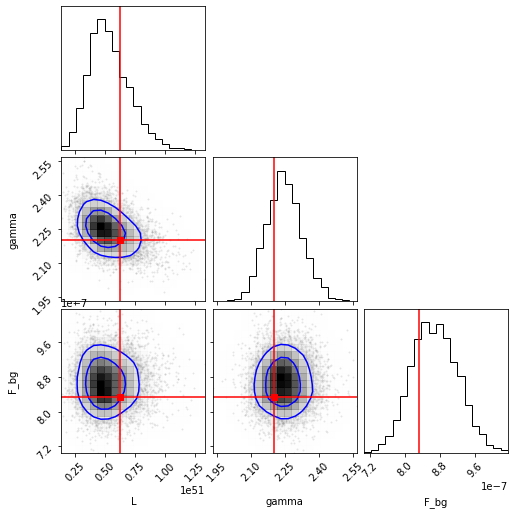

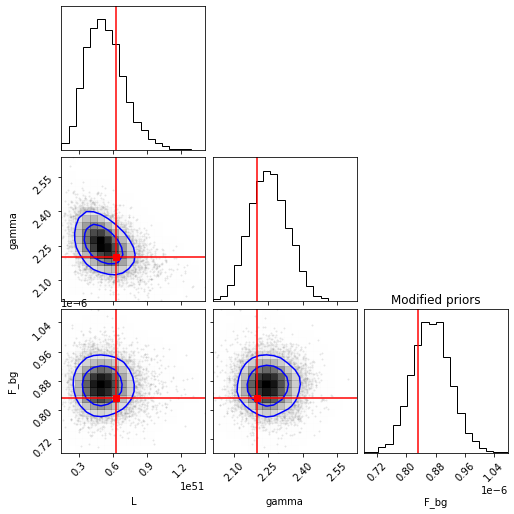

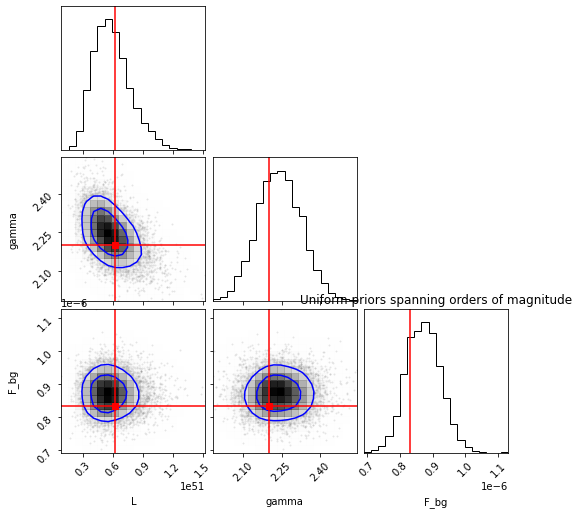

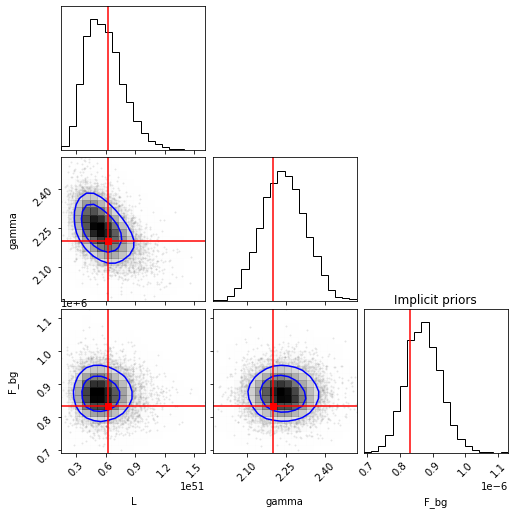

In [11]:
vnames = ['L','gamma','F_bg']

bhm.plot_corner(vnames, [sim.truth[nam] for nam in vnames], truth_color='r',
smooth=True, levels=(.393,.68,), contour_kwargs={'colors':'b'})
plt.show()

bhmop.plot_corner(vnames, [sim.truth[nam] for nam in vnames], truth_color='r',
smooth=True, levels=(.393,.68,), contour_kwargs={'colors':'b'})
plt.title('Modified priors')
plt.show()

bhmup.plot_corner(vnames, [sim.truth[nam] for nam in vnames], truth_color='r',
smooth=True, levels=(.393,.68,), contour_kwargs={'colors':'b'})
plt.title('Uniform priors spanning orders of magnitude')
plt.show()

bhmip.plot_corner(vnames, [sim.truth[nam] for nam in vnames], truth_color='r',
smooth=True, levels=(.393,.68,), contour_kwargs={'colors':'b'})
plt.title('Implicit priors')
plt.show()




In [12]:
bhmup.print_diagnostic()

INFO:cmdstanpy:Processing csv files: /tmp/tmpkk8beryf/toy_bhm_unifpriors-202104202102-1-2u9yotzn.csv, /tmp/tmpkk8beryf/toy_bhm_unifpriors-202104202102-2-8e9t1y8v.csv, /tmp/tmpkk8beryf/toy_bhm_unifpriors-202104202102-3-za3ksu7b.csv, /tmp/tmpkk8beryf/toy_bhm_unifpriors-202104202102-4-fh8p7lzh.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.
